# Online Shopping Behaviour / Intention Prediction
#### Tjark Petersen, May 2020

The data is from the UCI Machine Learning Repository and can be found here:<br>
https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset <br>

The dataset contains 12,330 sessions from an online shop, obtained over a period of one year, where each session was generated by an individual user/customer. Each session is described by features about the users and their behaviour during the session. A binary variable "Revenue" indicates wheather the session was a success or not and shall be used as the target vector.

In [2]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [5]:
df = pd.read_csv('../files/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Variables

* Administrative, Informational, ProductRelated -> Different types of web pages. Number of times visited in the sesssin.
* Administrative_Duraton, Informational_Duration, ProductRelated_Duration -> The total time per session spent on these website types.
* BounceRates -> Share of users that bounce (user enters website and exits without relevant activity).
* ExitRates -> Share of page views that ended the session (last page before exit) by the total number of page views. High exit rate means that users seem to exit often from a particular page.
* PageValues -> Mean number of visits before a transaction was processed.
* SpecialDay -> How close the day was to a day with high expected revenues (e.g. Xmas).
* Month -> self explanatory
* OperatingSystems -> self explanatory
* Browser -> self explanatory
* Region -> self explanatory
* TrafficType -> Indicates whether a user has used the website befre,
* VisitorType -> e.g.- organic, referral, direct, social
* Weekend -> self explanatory
* Revenue -> self explanatory -> TARGET VECTOR

#### Potential Issues:
* duration -> -1 does not make sense, also max outliers might be due to non-activity
* what point in time were metrics measured?
* one-hot-encode categorical variables (including the integer categories, e.g. traffic type)
* numeric variables: need to scale features due to very different value ranges. Maybe transformation due to skewness
* transform revenue to binary (label encoding)

#### Time dimension:
* Measurement of certain features is not known
* The point in time when metrics where calculated is unclear
* These uncertainties make it difficult to think about the actual use case/implementation of the predictive ability

**e.g. Administrative_Duration:** <br>
For a business, a prediction must be available as early as possible in order to act (e.g. incentivise a customer). However, features in this data set such as the administrative duration are tough to measure within a session due to the fact that a session can vary in time hence the measures would not be comparable. In the graph below I imagined a potential use case. It makes clear that domain knowledge and clearity about how the metrics were generated would be crucial in a real world szenario..
<img src="szenario.png">

In [6]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

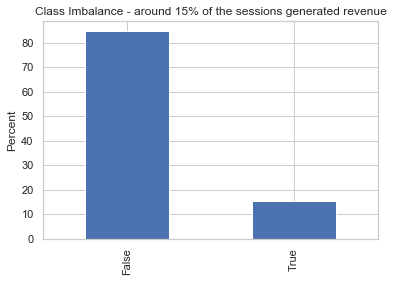

In [7]:
ax = (df['Revenue'].value_counts(normalize=True)*100).plot.bar()
ax.set(ylabel='Percent')
ax.set_title('Class Imbalance - around 15% of the sessions generated revenue')
plt.show()

### Numeric Features

In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [12]:
continuous_features = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

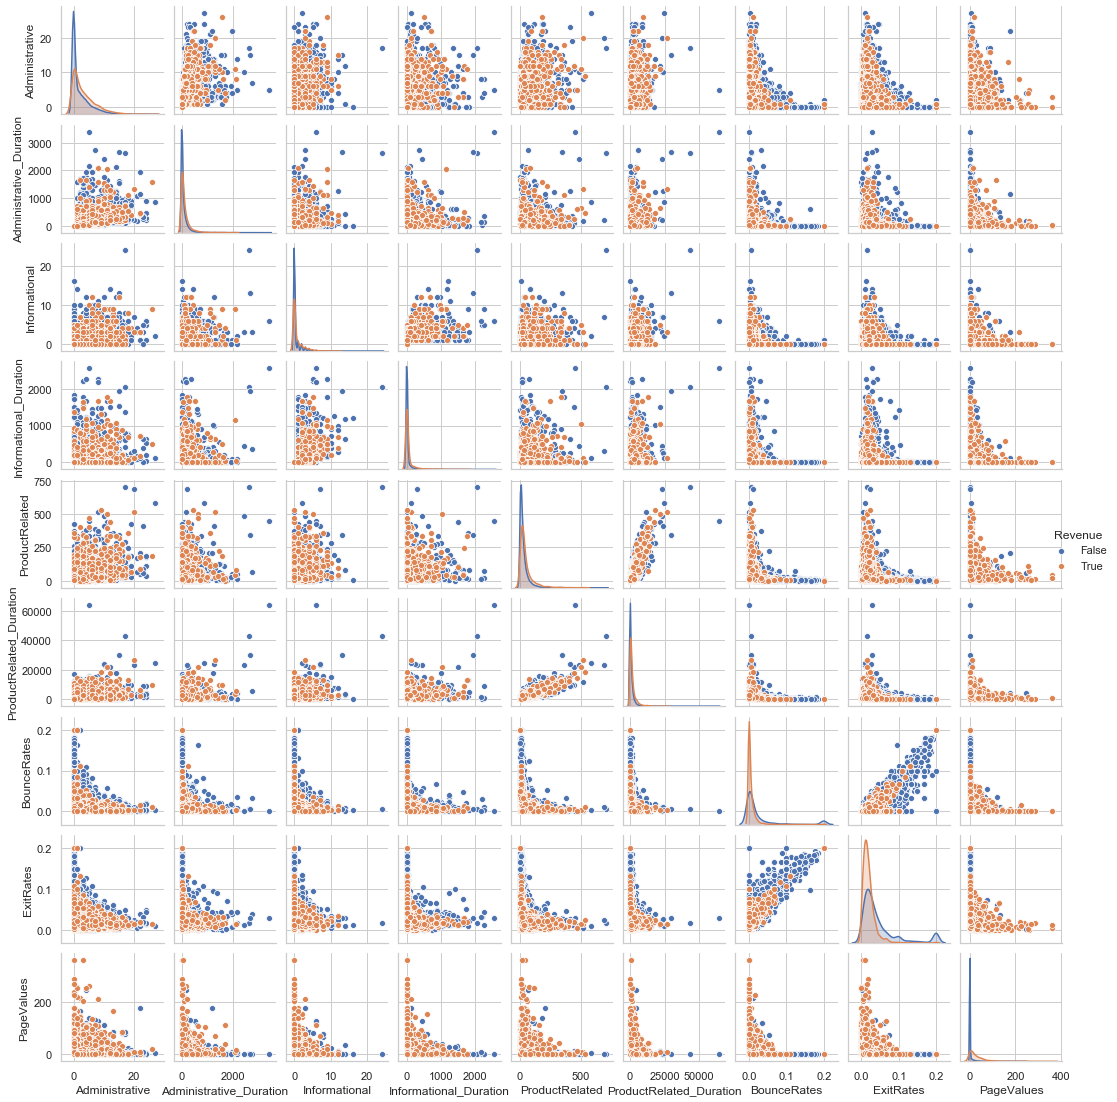

In [24]:
continuous_plus_outcome = continuous_features + ['Revenue']
pp = sns.pairplot(df[continuous_plus_outcome], hue='Revenue')
pp.fig.set_size_inches(15,15)

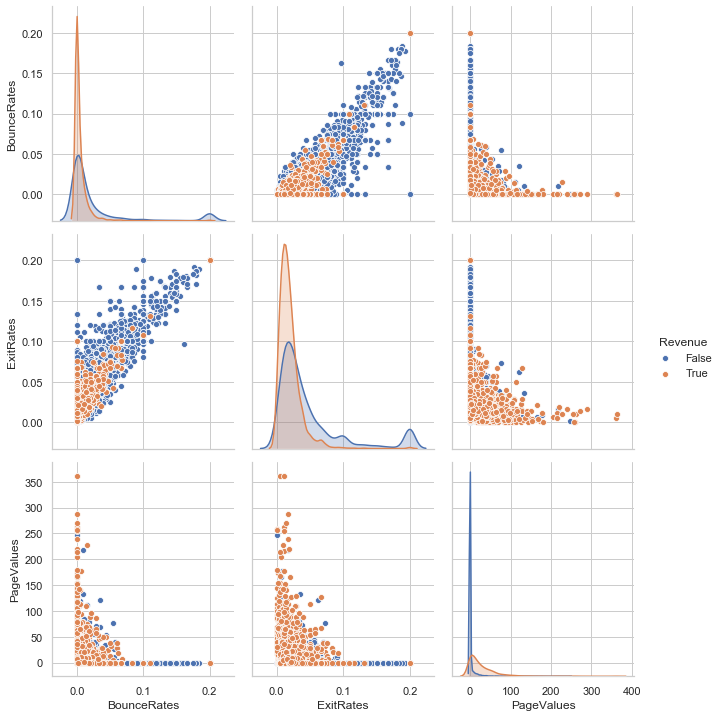

In [26]:
# take a closer look at bounce rate, exit rate and page values
cols = ['Revenue', 'BounceRates', 'ExitRates', 'PageValues']
pp = sns.pairplot(df[cols], hue='Revenue')
pp.fig.set_size_inches(10,10)

In [29]:
from sklearn.manifold import TSNE
df_tsne = df[cols].dropna().sample(1000)
X_embedded = TSNE(n_components=2).fit_transform(df_tsne[['BounceRates', 'ExitRates', 'PageValues']])

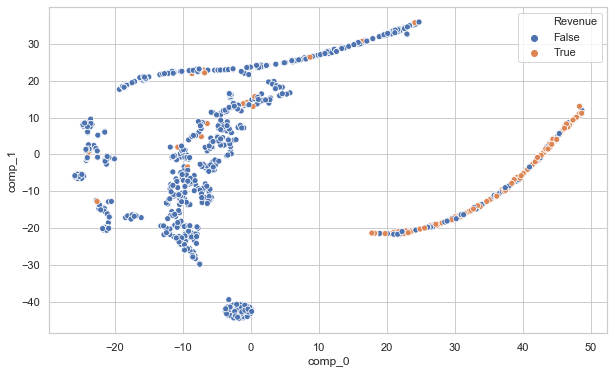

In [50]:
# The TSNE plot shows clearly that even the 3 features that I selected above contain enough signal to classify 
# most of the instances. 
df_embedded = pd.DataFrame(X_embedded, columns=['comp_0', 'comp_1'])
df_embedded['Revenue'] = df_tsne['Revenue'].tolist()
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='comp_0', y='comp_1', hue='Revenue', data=df_embedded)

### Categorical Features

In [157]:
categorical_features = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
                        'Weekend']
# df_cat_plot = df[categorical_features].dropna().sample(1000)

In [135]:
# This function generated plot for the categorical features. The left graph displays the share of the instances that 
# for each category (indicator of how relevant it is) and on the right the share of revenue generating instances per
# category. Variation in categories that occur reasonibly often in the data could indicate a good predictor.  
def plot_cat_feature(feature_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    fig.suptitle('Feature: ' + str(feature_name))
    ax1.set_title('Percentage of data')
    ax2.set_title('Percentage of Revenue equals True')
    df[feature_name].value_counts(normalize=True, sort=True).sort_index().plot(kind='bar', ax=ax1)
    sns.pointplot(x=feature_name, y="revenue_binary", kind="point", data=df, ax=ax2);

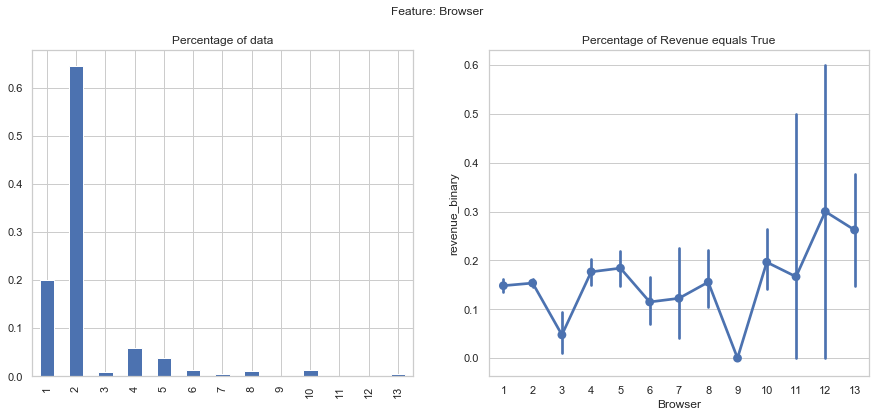

In [136]:
plot_cat_feature(feature_name="Browser")

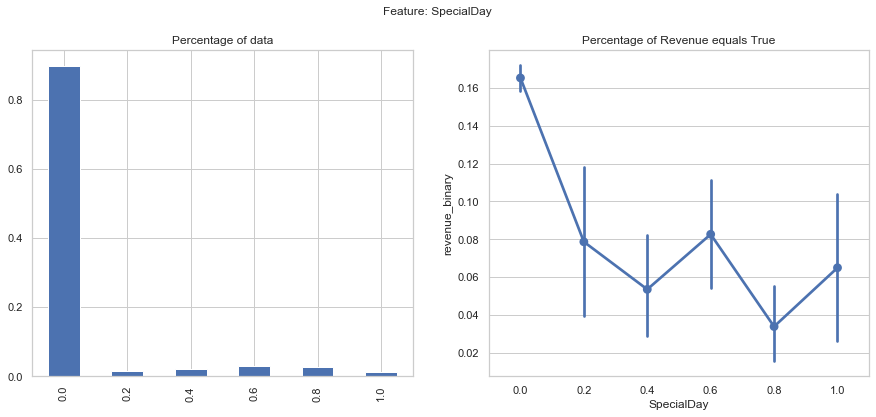

In [137]:
plot_cat_feature(feature_name="SpecialDay")

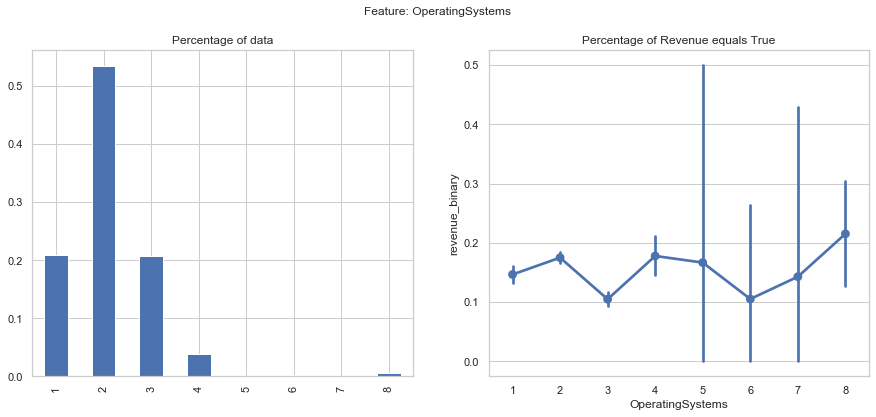

In [138]:
plot_cat_feature(feature_name="OperatingSystems")

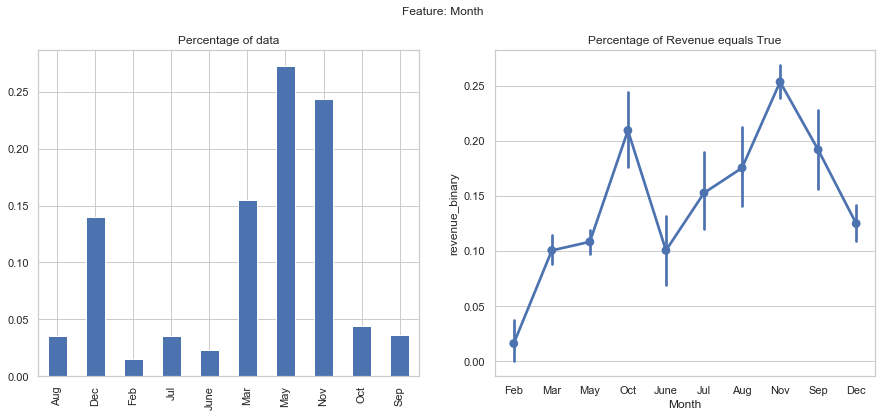

In [139]:
plot_cat_feature(feature_name="Month")

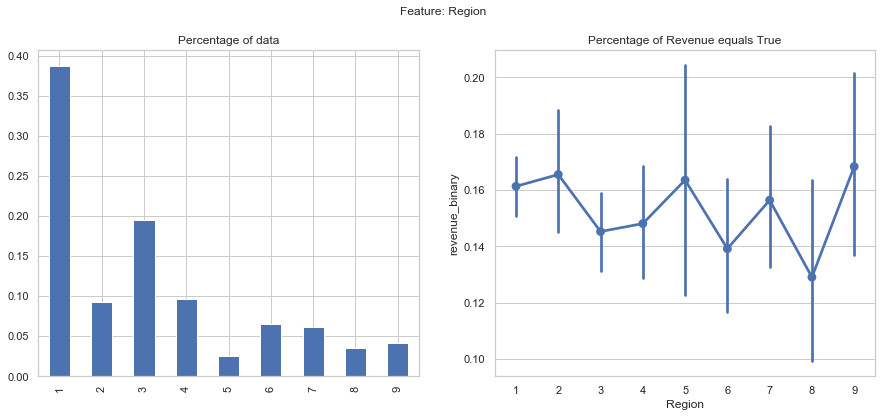

In [140]:
plot_cat_feature(feature_name="Region")

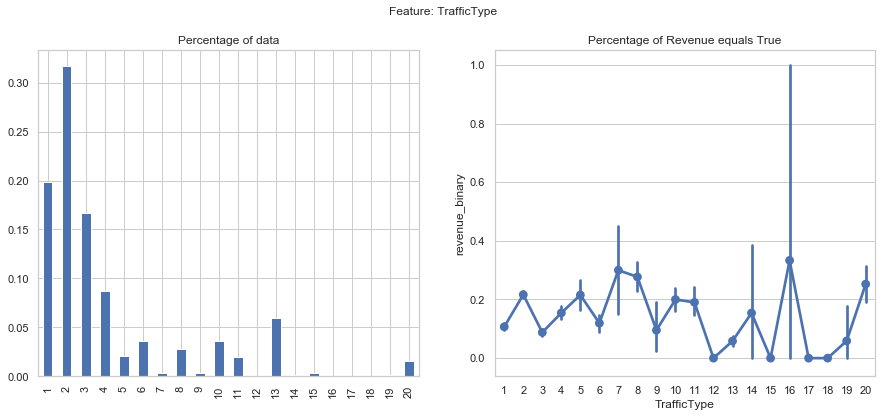

In [141]:
plot_cat_feature(feature_name="TrafficType")

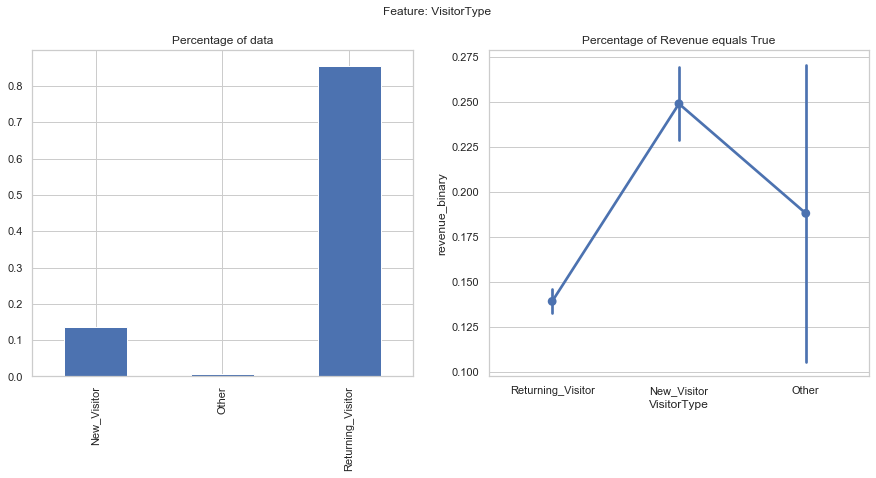

In [142]:
plot_cat_feature(feature_name="VisitorType")

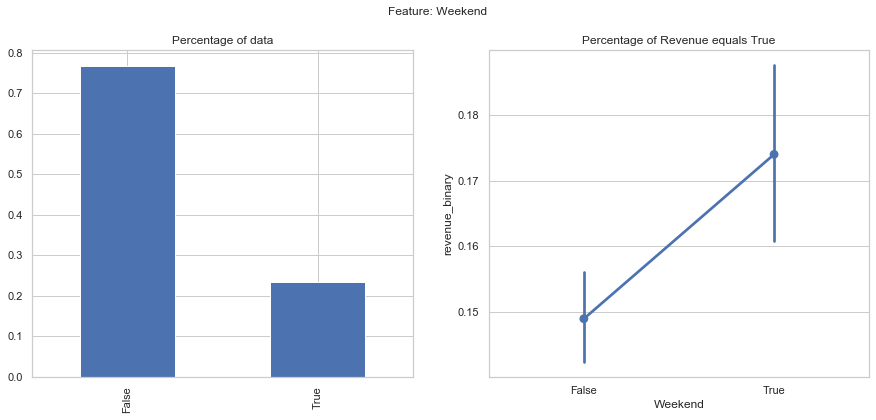

In [144]:
plot_cat_feature(feature_name="Weekend")

In [183]:
categorical_features = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
                        'Weekend', 'Revenue']
df_tsne = df[categorical_features].dropna().sample(1000)
# one.hot.encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
df_tsne_encoded = enc.fit_transform(df_tsne.iloc[:,:-1])
feature_names = enc.get_feature_names(df_tsne.iloc[:,:-1].columns)
print(df_tsne_encoded.shape)
X_embedded = TSNE(n_components=2).fit_transform(df_tsne_encoded)

(1000, 63)


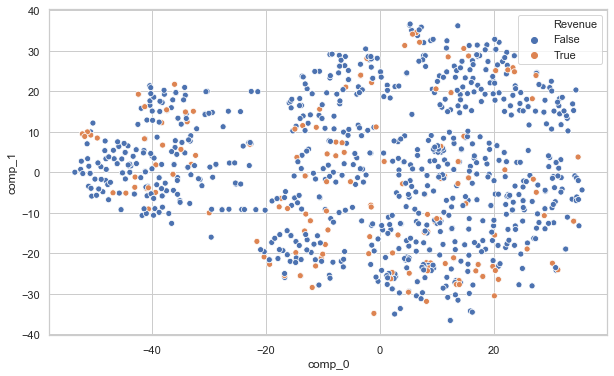

In [184]:
# The TSNE-plot (all categorical features) shows that the signal isn´t as strong as with the numeric fetures: 
# Visually, it is not possible to figure out a discriminant between the classes.
df_embedded = pd.DataFrame(X_embedded, columns=['comp_0', 'comp_1'])
df_embedded['Revenue'] = df_tsne['Revenue'].tolist()
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='comp_0', y='comp_1', hue='Revenue', data=df_embedded)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


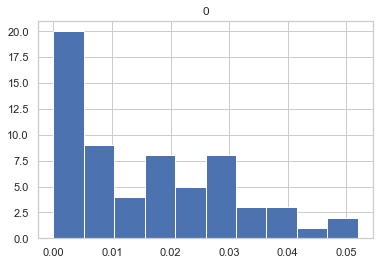

In [195]:
# The feature importancs of a standard enseble model affirm the previous observation that the categorical features
# seem to be less important. The most important features are the Operating system and the browser.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X=df_tsne_encoded, y=df_tsne.iloc[:,-1])
pd.DataFrame(model.feature_importances_).hist(bins=10);

In [199]:
feature_importances = zip(feature_names, model.feature_importances_)
list(sorted(feature_importances, key=lambda x: x[1]))[-5:]

[('OperatingSystems_2', 0.039043954710017946),
 ('Browser_2', 0.041514063402815916),
 ('Region_3', 0.043709752154206596),
 ('Month_Nov', 0.048145833427831616),
 ('Region_1', 0.05194080009089336)]

### Outlier, Missing Values, Corrupted Values

In [52]:
# Emptiness - Replace the 14 rows with median values
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [53]:
# Uniqueness/Duplicates -> the data has no IDs or similar, so it is hard to tell
df.duplicated().sum()
# df[df.duplicated()] -> seem to be natural occurances

119

### Closer inspection / feature crossing of numric features 

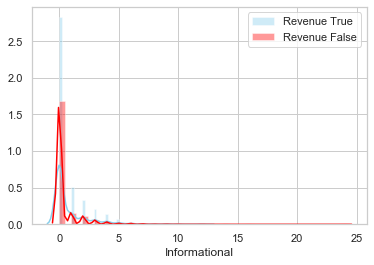

In [155]:
subset_true = df[df['Revenue'] == True]
subset_false = df[df['Revenue'] == False]

sns.distplot( subset_true["Informational"] , color="skyblue", label="Revenue True")
sns.distplot( subset_false["Informational"] , color="red", label="Revenue False")
plt.legend();

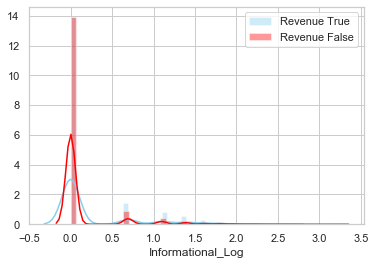

In [156]:
df["Informational_Log"] = df["Informational"].map(lambda i: np.log(i) if i > 0 else 0)
subset_true = df[df['Revenue'] == True]
subset_false = df[df['Revenue'] == False]

sns.distplot( subset_true["Informational_Log"] , color="skyblue", label="Revenue True")
sns.distplot( subset_false["Informational_Log"] , color="red", label="Revenue False")
plt.legend();

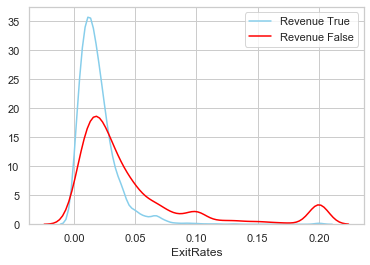

In [205]:
subset_true = df[df['Revenue'] == True]
subset_false = df[df['Revenue'] == False]

sns.distplot( subset_true["ExitRates"], hist=False, color="skyblue", label="Revenue True")
sns.distplot( subset_false["ExitRates"] , hist=False, color="red", label="Revenue False")
plt.legend();

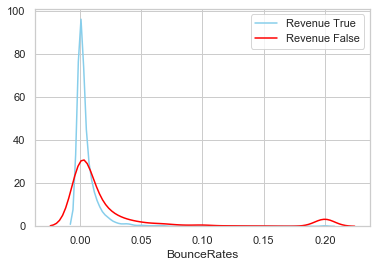

In [204]:
sns.distplot( subset_true["BounceRates"], hist=False, color="skyblue", label="Revenue True")
sns.distplot( subset_false["BounceRates"] , hist=False, color="red", label="Revenue False")
plt.legend();

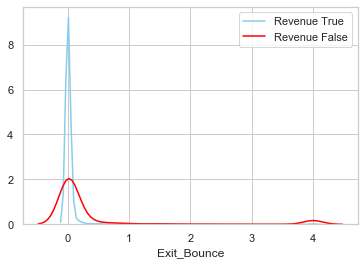

In [209]:
df['Exit_Bounce'] = df['ExitRates']*df['BounceRates']*100
subset_true = df[df['Revenue'] == True]
subset_false = df[df['Revenue'] == False]

sns.distplot( subset_true["Exit_Bounce"], hist=False, color="skyblue", label="Revenue True")
sns.distplot( subset_false["Exit_Bounce"] , hist=False, color="red", label="Revenue False")
plt.legend();

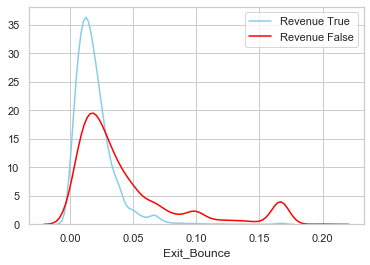

In [218]:
df['Exit_Bounce'] = df['ExitRates']/(df['BounceRates'] + 1)
subset_true = df[df['Revenue'] == True]
subset_false = df[df['Revenue'] == False]

sns.distplot( subset_true["Exit_Bounce"], hist=False, color="skyblue", label="Revenue True")
sns.distplot( subset_false["Exit_Bounce"] , hist=False, color="red", label="Revenue False")
plt.legend();

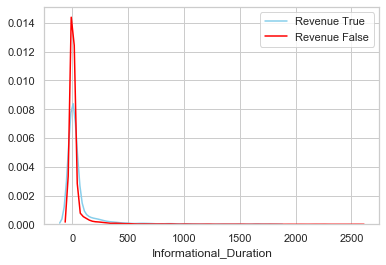

In [221]:
subset_true = df[df['Revenue'] == True]
subset_false = df[df['Revenue'] == False]

sns.distplot( subset_true["Informational_Duration"], hist=False, color="skyblue", label="Revenue True")
sns.distplot( subset_false["Informational_Duration"] , hist=False, color="red", label="Revenue False")
plt.legend();

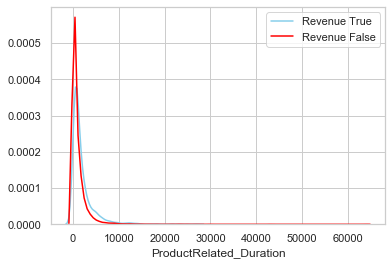

In [222]:
subset_true = df[df['Revenue'] == True]
subset_false = df[df['Revenue'] == False]

sns.distplot( subset_true["ProductRelated_Duration"], hist=False, color="skyblue", label="Revenue True")
sns.distplot( subset_false["ProductRelated_Duration"] , hist=False, color="red", label="Revenue False")
plt.legend();

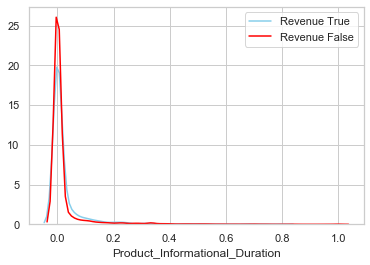

In [238]:
df['Product_Informational_Duration'] = df['Informational_Duration']/(df['Informational_Duration']+df['Administrative_Duration']+df['ProductRelated_Duration'])
subset_true = df[df['Revenue'] == True]
subset_false = df[df['Revenue'] == False]
sns.distplot( subset_true["Product_Informational_Duration"], hist=False, color="skyblue", label="Revenue True")
sns.distplot( subset_false["Product_Informational_Duration"] , hist=False, color="red", label="Revenue False")
plt.legend();

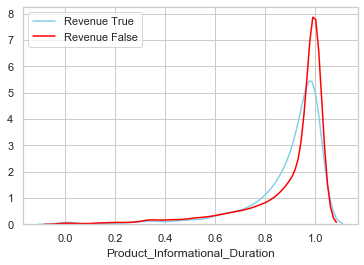

In [236]:
df['Product_Informational_Duration'] = df['ProductRelated_Duration']/(df['Informational_Duration']+df['Administrative_Duration']+df['ProductRelated_Duration'])
subset_true = df[df['Revenue'] == True]
subset_false = df[df['Revenue'] == False]
sns.distplot( subset_true["Product_Informational_Duration"], hist=False, color="skyblue", label="Revenue True")
sns.distplot( subset_false["Product_Informational_Duration"] , hist=False, color="red", label="Revenue False")
plt.legend();

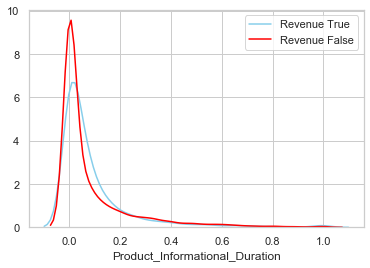

In [239]:
# Measuring the time spent on a certain type of website relative the time spend on other types of websites (e.g.
# product related vs. admistrative and informational) could be valuable for the classification task.
df['Product_Informational_Duration'] = df['Administrative_Duration']/(df['Informational_Duration']+df['Administrative_Duration']+df['ProductRelated_Duration'])
subset_true = df[df['Revenue'] == True]
subset_false = df[df['Revenue'] == False]
sns.distplot( subset_true["Product_Informational_Duration"], hist=False, color="skyblue", label="Revenue True")
sns.distplot( subset_false["Product_Informational_Duration"] , hist=False, color="red", label="Revenue False")
plt.legend();

### @ Thanh Ha: 
1) Was würdest du noch anpassen, hinzufügen? 

2) Wie würdest du mit der right-skewness umgehen? Eigentlich wollte ich noch Outlier detection machen, aber es scheint durch die Domain (online shopping sessions, z.b. leute lassen den pc an und gehen weg) normal zu sein, dass es extreme werte gibt..
